In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 1. Collecting the Data

In [3]:
import seaborn as sns
titanic_df = sns.load_dataset('titanic')
titanic_df.shape

(891, 15)

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
titanic_df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [6]:
# to create the CSV file of dataset with name titanic_data.csv
titanic_df.to_csv('titanic_data.csv' , index=False)
titanic_df.to_csv(index=False)

'survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone\r\n0,3,male,22.0,1,0,7.25,S,Third,man,True,,Southampton,no,False\r\n1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False\r\n1,3,female,26.0,0,0,7.925,S,Third,woman,False,,Southampton,yes,True\r\n1,1,female,35.0,1,0,53.1,S,First,woman,False,C,Southampton,yes,False\r\n0,3,male,35.0,0,0,8.05,S,Third,man,True,,Southampton,no,True\r\n0,3,male,,0,0,8.4583,Q,Third,man,True,,Queenstown,no,True\r\n0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True\r\n0,3,male,2.0,3,1,21.075,S,Third,child,False,,Southampton,no,False\r\n1,3,female,27.0,0,2,11.1333,S,Third,woman,False,,Southampton,yes,False\r\n1,2,female,14.0,1,0,30.0708,C,Second,child,False,,Cherbourg,yes,False\r\n1,3,female,4.0,1,1,16.7,S,Third,child,False,G,Southampton,yes,False\r\n1,1,female,58.0,0,0,26.55,S,First,woman,False,C,Southampton,yes,True\r\n0,3,male,20.0,0,0,8.05,S,Third,man,True,,Southampton,no,True\r\

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## conclusion from .info   = 
1. total 15 columns.
2. Age,embarked,deck,embark_town - these have missing values.

In [8]:
titanic_df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


# 2. Analysing Data - Create different plots to check relationship bw variables.

In [9]:
titanic_df.drop(columns='deck',inplace=True)

In [10]:
len(titanic_df)

891

In [11]:
titanic_df.value_counts('survived')
# so 549 people died and 342 peple were alive.

survived
0    549
1    342
dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

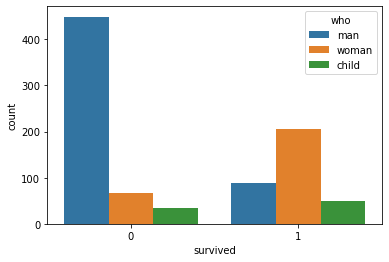

In [12]:
sns.countplot(x='survived',data=titanic_df,hue='who')
# x=None,
#     y=None,
#     hue=None,
#     data=None,
#     order=None,
#     hue_order=None,
#     orient=None,
#     color=None,
#     palette=None,
#     saturation=0.75,
#     dodge=True,

<AxesSubplot:xlabel='survived', ylabel='count'>

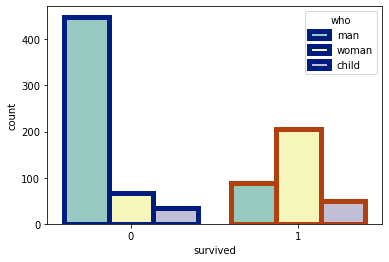

In [13]:
sns.countplot(x='survived',data=titanic_df,hue='who', palette="Set3",linewidth=5,edgecolor=sns.color_palette("dark", 3))

#     order=None,
#     hue_order=None,
#     orient=None,
#     color=None,
#     palette=None,
#     saturation=0.75,
#     dodge=True,

<AxesSubplot:xlabel='survived', ylabel='count'>

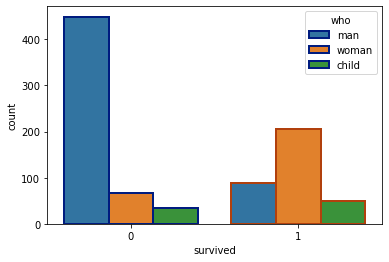

In [14]:
sns.countplot(x='survived',data=titanic_df,hue='who',linewidth=2,edgecolor=sns.color_palette("dark", 3) )

<AxesSubplot:xlabel='pclass', ylabel='count'>

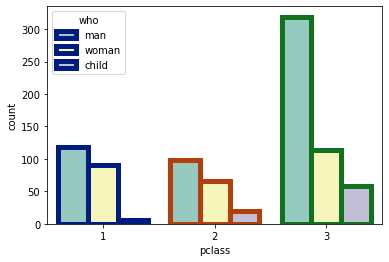

In [15]:
sns.countplot(x='pclass',data=titanic_df,hue='who', palette="Set3",linewidth=5,edgecolor=sns.color_palette("dark", 3))

In [16]:
titanic_df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='who'>

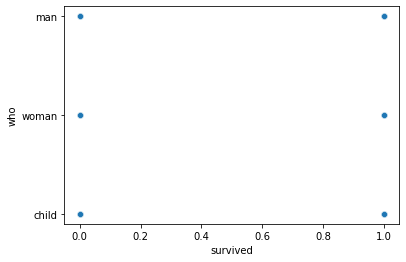

In [17]:
sns.scatterplot(x='survived',y='who', data=titanic_df)

In [18]:
titanic_df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [19]:
sorted(titanic_df['age'].unique())

[0.83,
 2.0,
 3.0,
 4.0,
 5.0,
 7.0,
 8.0,
 11.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 28.5,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 38.0,
 nan,
 0.42,
 0.67,
 0.75,
 0.92,
 1.0,
 6.0,
 9.0,
 10.0,
 12.0,
 13.0,
 14.5,
 20.5,
 23.5,
 24.5,
 30.5,
 32.5,
 34.5,
 36.0,
 36.5,
 37.0,
 39.0,
 40.0,
 40.5,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 45.5,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 55.5,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 70.0,
 70.5,
 71.0,
 74.0,
 80.0]

<AxesSubplot:>

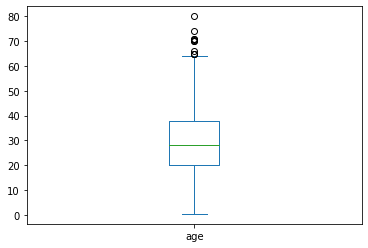

In [20]:
titanic_df['age'].plot(kind='box')

<AxesSubplot:xlabel='age', ylabel='survived'>

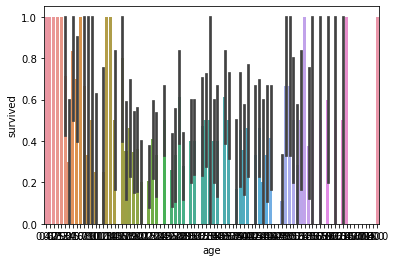

In [21]:
sns.barplot('age','survived',data=titanic_df)

<AxesSubplot:title={'center':'Age chart'}>

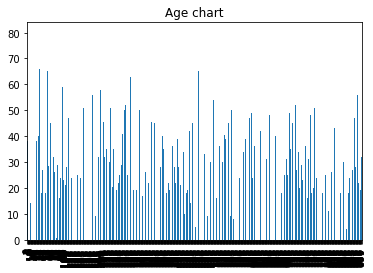

In [22]:
titanic_df['age'].plot(kind='bar',use_index=True,title='Age chart')

<AxesSubplot:title={'center':'Age chart'}, ylabel='Frequency'>

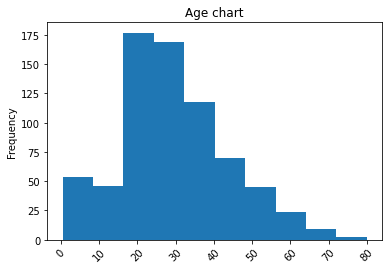

In [23]:
titanic_df['age'].plot(kind='hist',use_index=True,title='Age chart',rot=45)

<AxesSubplot:xlabel='age', ylabel='count'>

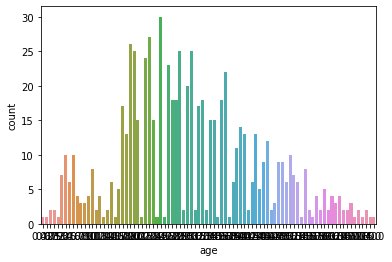

In [24]:
sns.countplot(x='age',data=titanic_df)

In [25]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [27]:
titanic_df['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

<AxesSubplot:xlabel='sibsp', ylabel='count'>

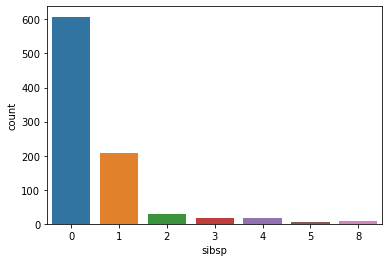

In [28]:
sns.countplot(titanic_df['sibsp'])

In [29]:
titanic_df['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

<AxesSubplot:xlabel='parch', ylabel='count'>

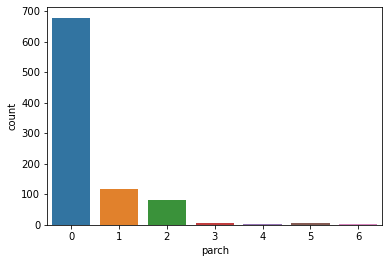

In [30]:
sns.countplot(titanic_df['parch'])

<AxesSubplot:>

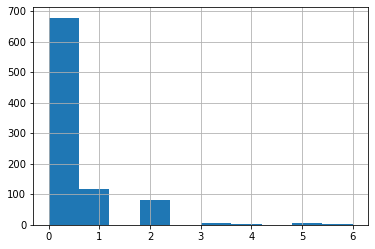

In [31]:
titanic_df['parch'].hist()

<AxesSubplot:>

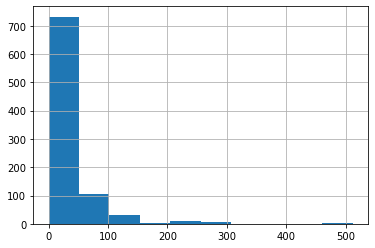

In [32]:
titanic_df['fare'].hist()

<AxesSubplot:ylabel='Frequency'>

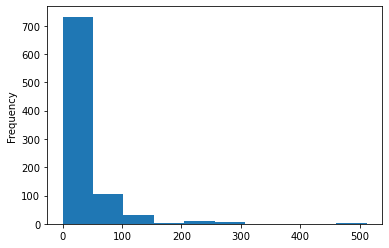

In [33]:
titanic_df['fare'].plot(kind='hist')

<AxesSubplot:>

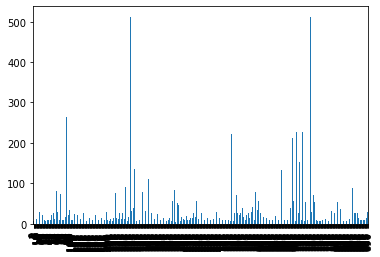

In [34]:
titanic_df['fare'].plot(kind='bar')

In [35]:
titanic_df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

<AxesSubplot:xlabel='embarked', ylabel='count'>

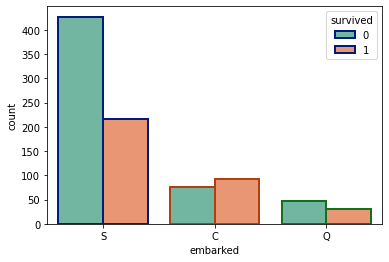

In [36]:
sns.countplot(x='embarked', data=titanic_df,linewidth=2,hue='survived',palette='Set2',edgecolor=sns.color_palette('dark'))

In [37]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [38]:
titanic_df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [39]:
titanic_df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [40]:
titanic_df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False


<AxesSubplot:xlabel='class', ylabel='count'>

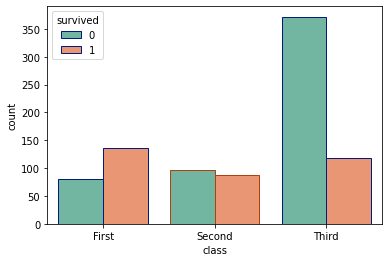

In [41]:
sns.countplot(x='class',hue='survived',data=titanic_df, palette='Set2',edgecolor=sns.color_palette('dark',2))

In [42]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


# change the datatype of a column

In [43]:
titanic_df =titanic_df.astype({"survived": "object", "pclass": "object"})

In [44]:
# titanic_dataframe=titanic_df.copy()
titanic_df['embarked'].fillna(titanic_df['embarked'].value_counts().idxmax(),inplace=True)

In [45]:
titanic_df['embarked'].value_counts().idxmax()

'S'

In [46]:
titanic_df['embarked'].value_counts().idxmin()

'Q'

In [47]:
titanic_df['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [48]:
titanic_dataframe.info()

NameError: name 'titanic_dataframe' is not defined

# Too many missing values in Deck so remove it.

In [ ]:
titanic_df.drop('deck',axis=1,inplace=True)

# for embark_town

In [49]:
titanic_df['embark_town'].fillna(titanic_df['embark_town'].value_counts().idxmax(),inplace=True)

In [50]:
titanic_df['embark_town'].value_counts().idxmax()

'Southampton'

In [51]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [52]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    object  
 1   pclass       891 non-null    object  
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(2), object(7)
memory usage: 79.4+ KB


# removing null values from age

In [53]:
# find % of data missing for age:
titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [54]:
titanic_df.shape[0]

891

In [55]:
age_missing_data_percent = titanic_df['age'].isnull().sum()/titanic_df.shape[0]*100
age_missing_data_percent

19.865319865319865

<AxesSubplot:>

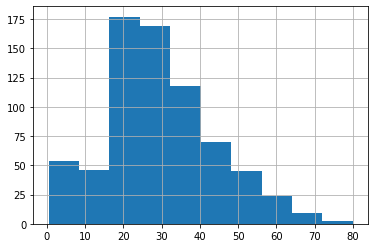

In [56]:
titanic_df['age'].hist()

<AxesSubplot:>

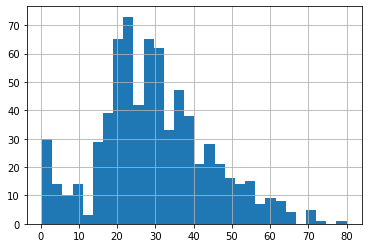

In [57]:
titanic_df['age'].hist(bins=30)

<AxesSubplot:xlabel='age', ylabel='count'>

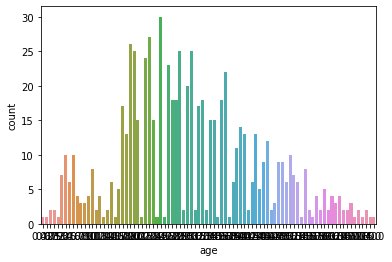

In [58]:
sns.countplot(titanic_df['age'])

In [59]:
titanic_df.corr()

,age,sibsp,parch,fare,adult_male,alone
age,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [60]:
titanic_df.describe()

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [61]:
titanic_df.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,Queenstown,no,True


In [62]:
titanic_df['age']=titanic_df['age'].astype('float64')

In [63]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    object  
 1   pclass       891 non-null    object  
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(2), object(7)
memory usage: 79.4+ KB


In [64]:
titanic_df['age'].median()

28.0

In [65]:
titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)
# train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)

In [66]:
titanic_df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [67]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    object  
 1   pclass       891 non-null    object  
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(2), object(7)
memory usage: 79.4+ KB


In [68]:
titanic_df.groupby(['who']).agg({'age':['min','max']})

age      
         min   max
who               
child   0.42  15.0
man    16.00  80.0
woman  16.00  63.0

In [69]:
titanic_df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# Now all the data is cleaned. No missing data

# create a new column called modified_age(just for practice)

Steps:
    1. create a function or logic 
    2. use the apply function and store it in new variable.

In [70]:
def mod_age(age):
    if(age<30):
        age=age+2
    else:
        age=age-2
    return age

In [71]:
titanic_df['modified_age'] = titanic_df['age'].apply(mod_age)

In [72]:
titanic_df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,modified_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,24.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,36.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,28.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,33.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,33.0
5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,Queenstown,no,True,30.0
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True,52.0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False,4.0
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False,29.0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False,16.0


In [73]:
titanic_df[['age','modified_age']]

,age,modified_age
0,22.0,24.0
1,38.0,36.0
2,26.0,28.0
3,35.0,33.0
4,35.0,33.0
...,...,...
886,27.0,29.0
887,19.0,21.0
888,28.0,30.0
889,26.0,28.0


In [74]:
titanic_df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: survived, dtype: object

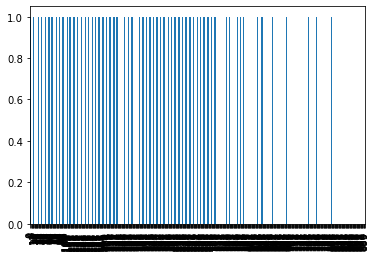

In [75]:
titanic_df.groupby(['sex'])['survived'].plot(kind='bar')

<AxesSubplot:xlabel='sex'>

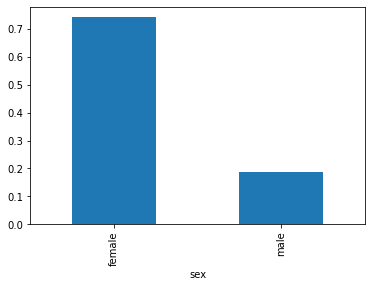

In [76]:
titanic_df.groupby(['sex'])['survived'].mean().plot(kind='bar')

<AxesSubplot:xlabel='pclass'>

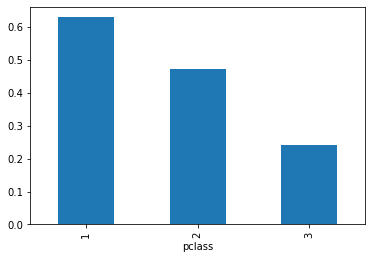

In [77]:
titanic_df.groupby(['pclass'])['survived'].mean().plot(kind='bar')

# TRANSFORMATION
--> outlier treatment

In [78]:
x=pd.qcut(x=titanic_df['fare'],q=5)

In [79]:
x.value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: fare, dtype: int64

In [80]:
titanic_df['fare'].min()

0.0

In [81]:
titanic_df['fare'].max()

512.3292

In [82]:
titanic_df['fare_bins']=pd.qcut(x=titanic_df['fare'],q=5)

In [83]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,modified_age,fare_bins
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,24.0,"(-0.001, 7.854]"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,36.0,"(39.688, 512.329]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,28.0,"(7.854, 10.5]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,33.0,"(39.688, 512.329]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,33.0,"(7.854, 10.5]"


<AxesSubplot:xlabel='fare'>

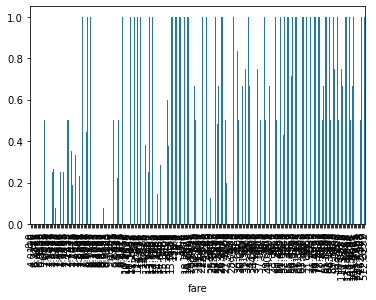

In [84]:
titanic_df.groupby(['fare'])['survived'].mean().plot(kind='bar')

<AxesSubplot:xlabel='fare,survived'>

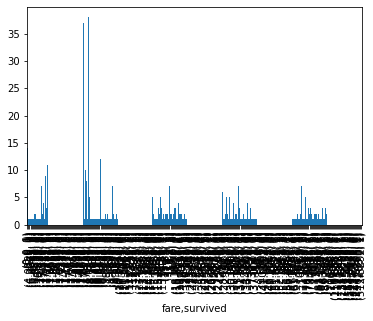

In [85]:
titanic_df.groupby(['fare'])['survived'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='fare'>

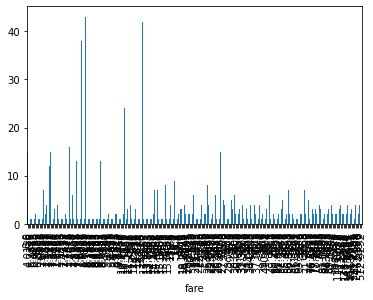

In [86]:
titanic_df.groupby(['fare'])['survived'].count().plot(kind='bar')

<AxesSubplot:xlabel='fare', ylabel='count'>

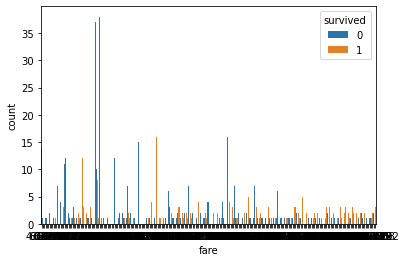

In [87]:
sns.countplot(x='fare',data=titanic_df,hue='survived')

# Frequency Plot - A frequency plot is a graphical data analysis technique for summarizing the distributional information of a variable. The response variable is divided into equal sized intervals (or bins). The number of occurrences of the response variable is calculated for each bin

<AxesSubplot:xlabel='fare'>

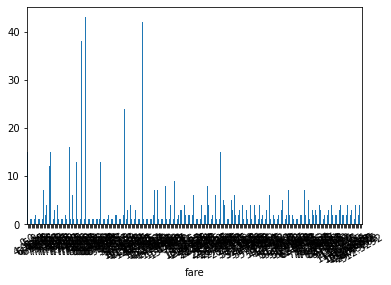

In [88]:
# frequency plot for fare
titanic_df.groupby(['fare'])['survived'].count().plot(kind='bar', rot=30)

<AxesSubplot:>

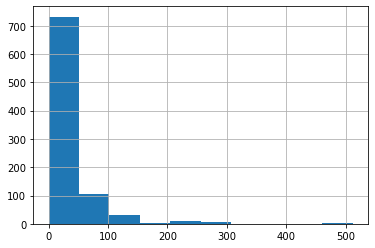

In [89]:
titanic_df['fare'].hist()

In [90]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,modified_age,fare_bins
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,24.0,"(-0.001, 7.854]"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,36.0,"(39.688, 512.329]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,28.0,"(7.854, 10.5]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,33.0,"(39.688, 512.329]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,33.0,"(7.854, 10.5]"


<AxesSubplot:xlabel='fare_bins'>

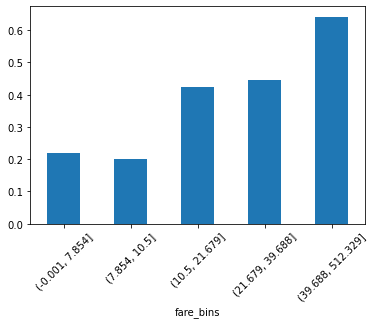

In [91]:
titanic_df.groupby(['fare_bins'])['survived'].mean().plot(kind='bar',rot=45)

<AxesSubplot:xlabel='fare_bins'>

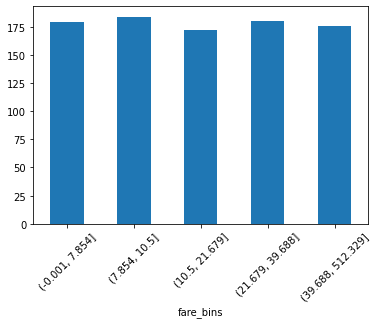

In [92]:
titanic_df.groupby(['fare_bins'])['survived'].count().plot(kind='bar',rot=45)

In [93]:
titanic_df['age_bin'] = pd.qcut(titanic_df['age'], q=5,duplicates='drop')
# titanic_df[['age','age_bins']].head()

In [94]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,modified_age,fare_bins,age_bin
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,24.0,"(-0.001, 7.854]","(20.0, 28.0]"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,36.0,"(39.688, 512.329]","(28.0, 38.0]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,28.0,"(7.854, 10.5]","(20.0, 28.0]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,33.0,"(39.688, 512.329]","(28.0, 38.0]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,33.0,"(7.854, 10.5]","(28.0, 38.0]"


In [95]:
titanic_df['age_bin'].value_counts()

(20.0, 28.0]     360
(0.419, 20.0]    179
(38.0, 80.0]     177
(28.0, 38.0]     175
Name: age_bin, dtype: int64

In [96]:
titanic_df['age_bin'].isnull().sum()

0

In [97]:
titanic_df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,modified_age,fare_bins,age_bin
79,1,3,female,30.0,0,0,12.4750,S,Third,woman,False,Southampton,yes,True,28.0,"(10.5, 21.679]","(28.0, 38.0]"
396,0,3,female,31.0,0,0,7.8542,S,Third,woman,False,Southampton,no,True,29.0,"(-0.001, 7.854]","(28.0, 38.0]"
422,0,3,male,29.0,0,0,7.8750,S,Third,man,True,Southampton,no,True,31.0,"(7.854, 10.5]","(28.0, 38.0]"
111,0,3,female,14.5,1,0,14.4542,C,Third,child,False,Cherbourg,no,False,16.5,"(10.5, 21.679]","(0.419, 20.0]"
661,0,3,male,40.0,0,0,7.2250,C,Third,man,True,Cherbourg,no,True,38.0,"(-0.001, 7.854]","(38.0, 80.0]"


<AxesSubplot:xlabel='age_bin'>

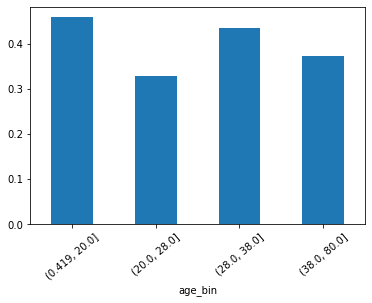

In [98]:
titanic_df.groupby(['age_bin'])['survived'].mean().plot(kind='bar',rot=40)

<AxesSubplot:xlabel='age_bin'>

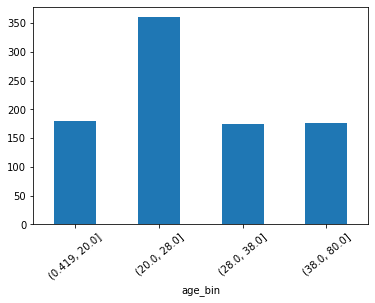

In [99]:
titanic_df.groupby(['age_bin'])['survived'].count().plot(kind='bar',rot=40)

<AxesSubplot:>

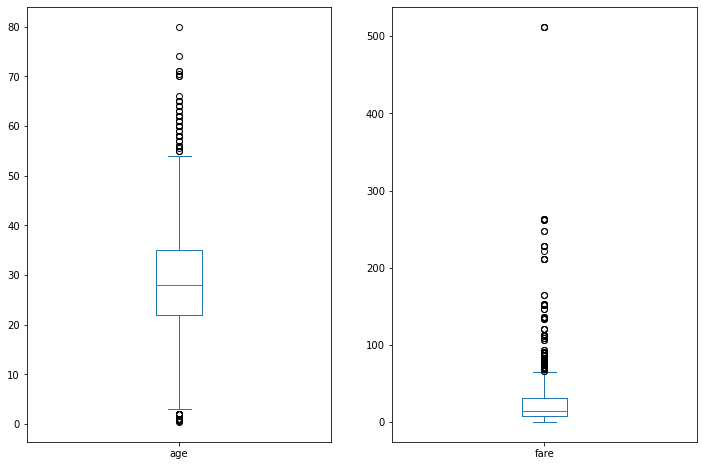

In [100]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
titanic_df['age'].plot(kind='box',ax=axes[0])
titanic_df['fare'].plot(kind='box',ax=axes[1])

In [101]:
# treating outliers for age

p25=titanic_df['age'].quantile(0.25)
p75=titanic_df['age'].quantile(0.75)
iqr=p75-p25
thr_min,thr_max=p25-1.5*iqr,p75+1.5*iqr
thr_min,thr_max

(2.5, 54.5)

In [102]:
# defining generic function for outlier treatment

def get_min_max_threshold(data,var):
    p25=data[var].quantile(0.25)
    p75=data[var].quantile(0.75)
    iqr=p75-p25
    thr_min,thr_max=p25-1.5*iqr,p75+1.5*iqr
    return thr_min,thr_max

In [103]:
x,y=get_min_max_threshold(titanic_df,'age')
x,y

(2.5, 54.5)

In [104]:
def outlier_treatment_iqr_method(val):
    if val>thr_max:
        return thr_max
    elif val<thr_min:
        return thr_min
    else:
        return val

In [105]:
thr_min,thr_max=get_min_max_threshold(titanic_df,'age')
titanic_df['age_treated']=titanic_df['age'].apply(outlier_treatment_iqr_method)

In [106]:
thr_min,thr_max=get_min_max_threshold(titanic_df,'fare')
titanic_df['fare_treated']=titanic_df['fare'].apply(outlier_treatment_iqr_method)

<AxesSubplot:>

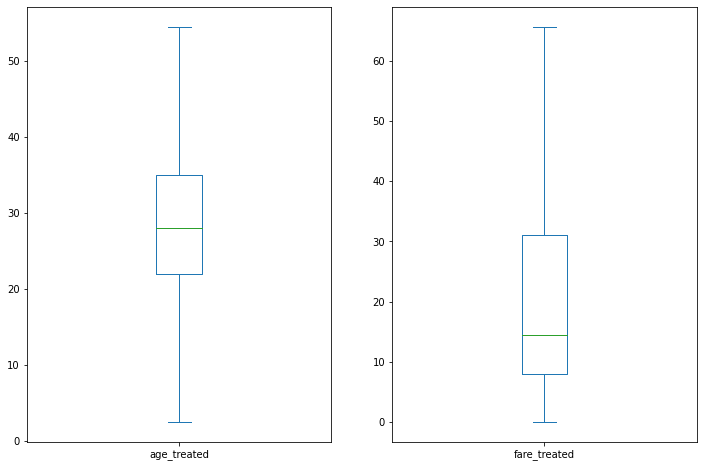

In [107]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
titanic_df['age_treated'].plot(kind='box',ax=axes[0])
titanic_df['fare_treated'].plot(kind='box',ax=axes[1])

# so no outliers in both of these columns

# STANDARDIZATION - 
A standard normal distribution is defined as a distribution with a mean of 0 and a standard deviation of 1.

In [108]:
titanic_df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,modified_age,fare_bins,age_bin,age_treated,fare_treated
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,24.0,"(-0.001, 7.854]","(20.0, 28.0]",22.0,7.2500
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,36.0,"(39.688, 512.329]","(28.0, 38.0]",38.0,65.6344
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,28.0,"(7.854, 10.5]","(20.0, 28.0]",26.0,7.9250
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,33.0,"(39.688, 512.329]","(28.0, 38.0]",35.0,53.1000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,33.0,"(7.854, 10.5]","(28.0, 38.0]",35.0,8.0500
5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,Queenstown,no,True,30.0,"(7.854, 10.5]","(20.0, 28.0]",28.0,8.4583
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True,52.0,"(39.688, 512.329]","(38.0, 80.0]",54.0,51.8625
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False,4.0,"(10.5, 21.679]","(0.419, 20.0]",2.5,21.0750
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False,29.0,"(10.5, 21.679]","(20.0, 28.0]",27.0,11.1333
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False,16.0,"(21.679, 39.688]","(0.419, 20.0]",14.0,30.0708


In [109]:
numeric_columns=num_col=['age_treated','sibsp','parch','fare_treated']
categorical_columns=cat_col=['pclass','sex','who','adult_male','embark_town','alone']

x=titanic_df[num_col+cat_col]
y=titanic_df['survived']

In [110]:
x.shape, y.shape

((891, 10), (891,))

In [111]:
# standardization  - it can only be performed at numeric columns.  Encoded categorical variables contain values on 0 and 1. 
# Therefore, there is even no need to scale them. However, scaling methods will be applied to them when you choose to scale 
# your entire dataset prior to using your data with scale-sensitive ML models.

from sklearn.preprocessing import StandardScaler

x_num_col = titanic_df[num_col]
scl=StandardScaler()
X_std_num_cols = scl.fit_transform(x_num_col)
X_std_num_cols.shape

(891, 4)

In [112]:
X_std_num_cols

array([[-0.58343208,  0.43279337, -0.47367361, -0.82055245],
       [ 0.74268522,  0.43279337, -0.47367361,  2.03162322],
       [-0.25190275, -0.4745452 , -0.47367361, -0.78757757],
       ...,
       [-0.08613809,  0.43279337,  2.00893337, -0.02915533],
       [-0.25190275, -0.4745452 , -0.47367361,  0.29082313],
       [ 0.24539123, -0.4745452 , -0.47367361, -0.79612661]])

In [113]:
X_std_num_cols.mean()

5.308137020093341e-17

In [114]:
X_std_num_cols.std()

0.9999999999999999

In [115]:
X_std_num_cols = pd.DataFrame(X_std_num_cols,columns=num_col)
X_std_num_cols

,age_treated,sibsp,parch,fare_treated
0,-0.583432,0.432793,-0.473674,-0.820552
1,0.742685,0.432793,-0.473674,2.031623
2,-0.251903,-0.474545,-0.473674,-0.787578
3,0.494038,0.432793,-0.473674,1.419297
4,0.494038,-0.474545,-0.473674,-0.781471
...,...,...,...,...
886,-0.169020,-0.474545,-0.473674,-0.539655
887,-0.832079,-0.474545,-0.473674,0.290823
888,-0.086138,0.432793,2.008933,-0.029155
889,-0.251903,-0.474545,-0.473674,0.290823


# categorical to numeric - 2 methods as below. use either
        --> one hot encoding / dummy variables
        --> label encoding
        * check number of categories does the variables have
        * num_of_categ --> number of dummy variables required
        * one dummy variable is going to give us same information, hence redundant
        * for n -> num_of_categ in a variable --> n-1 dummy variables

In [116]:
X_cat_cols= titanic_df[cat_col]
X_cat_cols.shape

(891, 6)

In [117]:
X_std_cat_df = pd.get_dummies(X_cat_cols,drop_first=True)
X_std_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   adult_male               891 non-null    bool 
 1   alone                    891 non-null    bool 
 2   pclass_2                 891 non-null    uint8
 3   pclass_3                 891 non-null    uint8
 4   sex_male                 891 non-null    uint8
 5   who_man                  891 non-null    uint8
 6   who_woman                891 non-null    uint8
 7   embark_town_Queenstown   891 non-null    uint8
 8   embark_town_Southampton  891 non-null    uint8
dtypes: bool(2), uint8(7)
memory usage: 8.0 KB


In [118]:
type(X_std_num_cols)

pandas.core.frame.DataFrame

In [119]:
type(X_std_cat_df)

pandas.core.frame.DataFrame

In [120]:
X_std_num_cols.head()

,age_treated,sibsp,parch,fare_treated
0,-0.583432,0.432793,-0.473674,-0.820552
1,0.742685,0.432793,-0.473674,2.031623
2,-0.251903,-0.474545,-0.473674,-0.787578
3,0.494038,0.432793,-0.473674,1.419297
4,0.494038,-0.474545,-0.473674,-0.781471


In [121]:
X_std_cat_df.head()

,adult_male,alone,pclass_2,pclass_3,sex_male,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton
0,True,False,0,1,1,1,0,0,1
1,False,False,0,0,0,0,1,0,0
2,False,True,0,1,0,0,1,0,1
3,False,False,0,0,0,0,1,0,1
4,True,True,0,1,1,1,0,0,1


In [122]:
X_std_num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age_treated   891 non-null    float64
 1   sibsp         891 non-null    float64
 2   parch         891 non-null    float64
 3   fare_treated  891 non-null    float64
dtypes: float64(4)
memory usage: 28.0 KB


In [123]:
X_std_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   adult_male               891 non-null    bool 
 1   alone                    891 non-null    bool 
 2   pclass_2                 891 non-null    uint8
 3   pclass_3                 891 non-null    uint8
 4   sex_male                 891 non-null    uint8
 5   who_man                  891 non-null    uint8
 6   who_woman                891 non-null    uint8
 7   embark_town_Queenstown   891 non-null    uint8
 8   embark_town_Southampton  891 non-null    uint8
dtypes: bool(2), uint8(7)
memory usage: 8.0 KB


In [124]:
X_std_cat_df=X_std_cat_df.astype({'pclass_3':'object','sex_male':'object','who_man':'object','who_woman':'object','embark_town_Queenstown':'object','embark_town_Southampton':'object'})

In [125]:
X_std_cat_df.isnull().sum()

adult_male                 0
alone                      0
pclass_2                   0
pclass_3                   0
sex_male                   0
who_man                    0
who_woman                  0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [126]:
X_final_data = pd.concat([X_std_num_cols , X_std_cat_df],axis=1)
X_final_data.head()

,age_treated,sibsp,parch,fare_treated,adult_male,alone,pclass_2,pclass_3,sex_male,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton
0,-0.583432,0.432793,-0.473674,-0.820552,True,False,0,1,1,1,0,0,1
1,0.742685,0.432793,-0.473674,2.031623,False,False,0,0,0,0,1,0,0
2,-0.251903,-0.474545,-0.473674,-0.787578,False,True,0,1,0,0,1,0,1
3,0.494038,0.432793,-0.473674,1.419297,False,False,0,0,0,0,1,0,1
4,0.494038,-0.474545,-0.473674,-0.781471,True,True,0,1,1,1,0,0,1


In [127]:
X_std_num_cols.reset_index(drop=True,inplace=True)
X_std_cat_df.reset_index(drop=True,inplace=True)

In [128]:
X_final_data

,age_treated,sibsp,parch,fare_treated,adult_male,alone,pclass_2,pclass_3,sex_male,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton
0,-0.583432,0.432793,-0.473674,-0.820552,True,False,0,1,1,1,0,0,1
1,0.742685,0.432793,-0.473674,2.031623,False,False,0,0,0,0,1,0,0
2,-0.251903,-0.474545,-0.473674,-0.787578,False,True,0,1,0,0,1,0,1
3,0.494038,0.432793,-0.473674,1.419297,False,False,0,0,0,0,1,0,1
4,0.494038,-0.474545,-0.473674,-0.781471,True,True,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.169020,-0.474545,-0.473674,-0.539655,True,True,1,0,1,1,0,0,1
887,-0.832079,-0.474545,-0.473674,0.290823,False,True,0,0,0,0,1,0,1
888,-0.086138,0.432793,2.008933,-0.029155,False,False,0,1,0,0,1,0,1
889,-0.251903,-0.474545,-0.473674,0.290823,True,True,0,0,1,1,0,0,0


In [129]:
X_final_data.isnull().sum().sum()

0

In [130]:
# Train test model
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_final_data,y, test_size=0.3,random_state=100)


In [131]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((623, 13), (268, 13), (623,), (268,))

In [132]:
X_train.head()

,age_treated,sibsp,parch,fare_treated,adult_male,alone,pclass_2,pclass_3,sex_male,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton
69,-0.251903,1.340132,-0.473674,-0.751549,True,False,0,1,1,1,0,0,1
85,0.328274,2.247470,-0.473674,-0.400428,False,False,0,1,0,0,1,0,1
794,-0.334785,-0.474545,-0.473674,-0.789004,True,True,0,1,1,1,0,0,1
161,0.908450,-0.474545,-0.473674,-0.405313,False,True,1,0,0,0,1,0,1
815,-0.086138,-0.474545,-0.473674,-1.174727,True,True,0,0,1,1,0,0,1


In [133]:
# train the ML model using train data

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

ValueError: Unknown label type: 'unknown'

In [134]:
# was getting error as - Unknown label type: 'unknown' -  so changed the datatype. and reexecuted the code  above.

Y_train=Y_train.astype('int')

In [135]:
Y_train.dtype

dtype('int32')

In [136]:
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [137]:
# predict for train and test data.

In [138]:
log_reg.predict_proba(X_train)

array([[0.95902859, 0.04097141],
       [0.6474149 , 0.3525851 ],
       [0.92375511, 0.07624489],
       ...,
       [0.06907779, 0.93092221],
       [0.96769603, 0.03230397],
       [0.04645531, 0.95354469]])

In [139]:
log_reg.predict(X_train)

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,

In [140]:
# Accuracy score 

from sklearn.metrics import accuracy_score
accuracy_score(Y_train,log_reg.predict(X_train))

0.8282504012841091

In [141]:
#  return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
accuracy_score(Y_train,log_reg.predict(X_train), normalize=False)

516

In [142]:
Y_test=Y_test.astype('int32')

In [143]:
print(accuracy_score(Y_test,log_reg.predict(X_test)))
print(accuracy_score(Y_test,log_reg.predict(X_test), normalize=False))

0.8208955223880597
220


In [148]:
# precison and recall. - both these should be similar to each other and not much difference.

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [184]:
precision,recall,z=precision_recall_curve(Y_train,log_reg.predict(X_train))

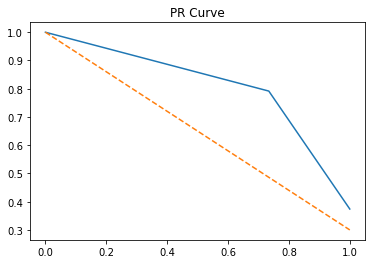

In [191]:
plt.plot(recall,precision)
plt.title('PR Curve')
plt.plot([0,1],[1,0.3],linestyle='--')

In [152]:
print(classification_report(Y_train,log_reg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       390
           1       0.79      0.73      0.76       233

    accuracy                           0.83       623
   macro avg       0.82      0.81      0.81       623
weighted avg       0.83      0.83      0.83       623



In [156]:
precision_recall_fscore_support(Y_train,log_reg.predict(X_train),average='macro')

(0.8196662571662572, 0.8092604820072631, 0.8137195999474645, None)

In [158]:
from sklearn.metrics import confusion_matrix

In [159]:
confusion_matrix(Y_train,log_reg.predict(X_train))

array([[345,  45],
       [ 62, 171]], dtype=int64)

In [162]:
print(confusion_matrix(Y_train,log_reg.predict(X_train)))
# correctly predicted 1's - 345
# wrongly predicted 1's - 45
# correctly predicted 0's - 171
# wrongly predicted 0's - 62

[[345  45]
 [ 62 171]]


In [163]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [169]:
roc_auc_score(Y_train, log_reg.predict(X_train))

0.8092604820072631

In [171]:
roc_auc_score(Y_train, log_reg.predict_proba(X_train)[:,1])

0.8758391108176516

In [175]:
falsepositive,truepositive,threshold = roc_curve(Y_train,log_reg.predict_proba(X_train)[:,1])

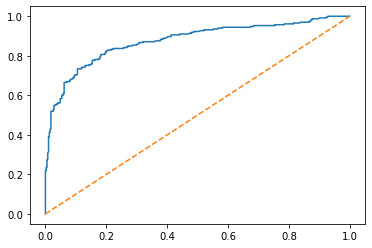

In [181]:
plt.plot(falsepositive,truepositive)
plt.plot([0,1], [0,1], linestyle='--')